In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("D:\Excelr_assignments\KNN\KNN\Zoo.csv")
df.head()


<>:3: SyntaxWarning: invalid escape sequence '\E'
<>:3: SyntaxWarning: invalid escape sequence '\E'
C:\Users\dell\AppData\Local\Temp\ipykernel_15756\1834342379.py:3: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv("D:\Excelr_assignments\KNN\KNN\Zoo.csv")


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.shape

(101, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
# checking the null values in the dataset :

df.isnull().sum()

# found that there are no null values in the data set:


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

<Axes: >

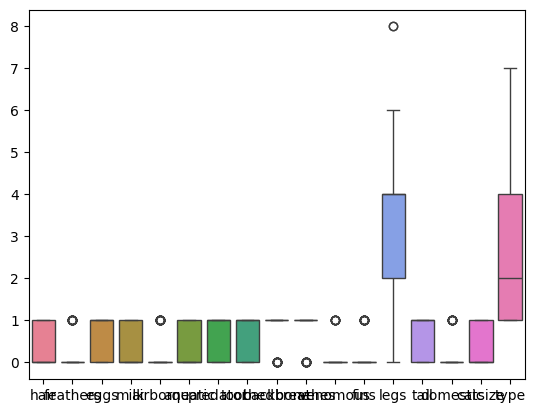

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df)

# we can observe that some of the columns in the data set are having the outlayers in them:


In [8]:
# removing the outlayers from the data set:

q1 = df.drop(columns = "animal name").quantile(0.25)
q3 = df.drop(columns = "animal name").quantile(0.75)
iqr = q3-q1
df = df[
        ~((df.drop(columns = "animal name").lt(q1 - 1.5 * iqr)) | (df.drop(columns = "animal name").gt(q3 + 1.5 * iqr))).any(axis=1)
]

<Axes: >

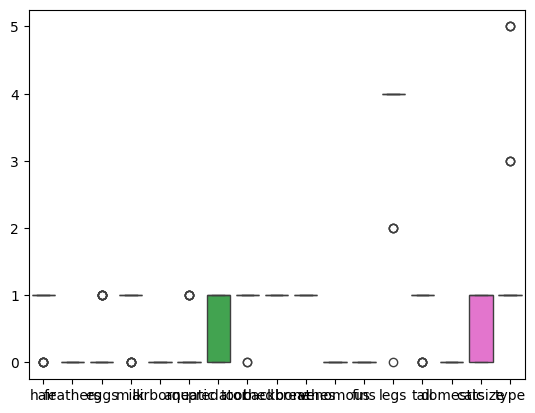

In [9]:
sns.boxplot(df)


In [10]:
columns = df.drop(columns =[ "animal name","type"]).columns
columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

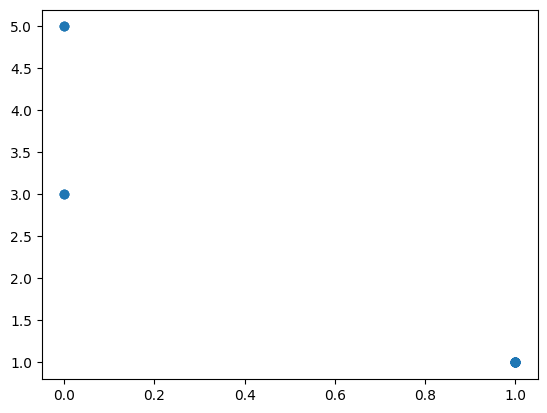

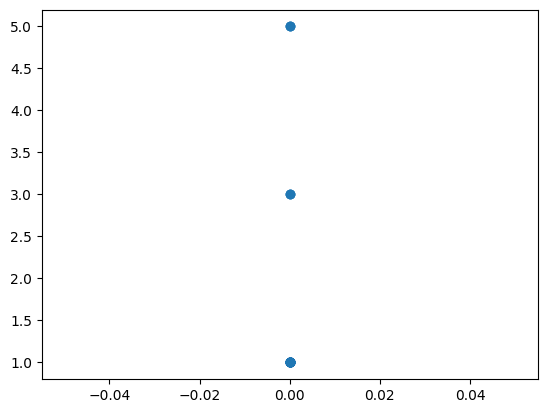

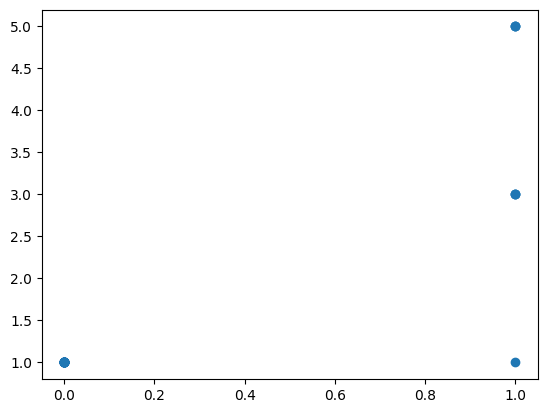

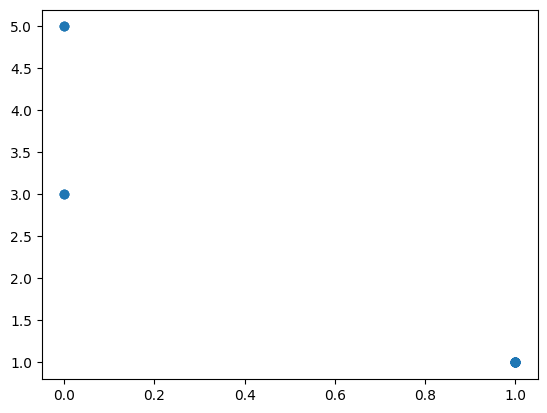

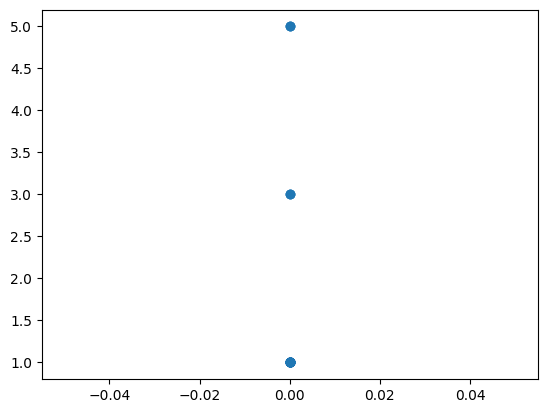

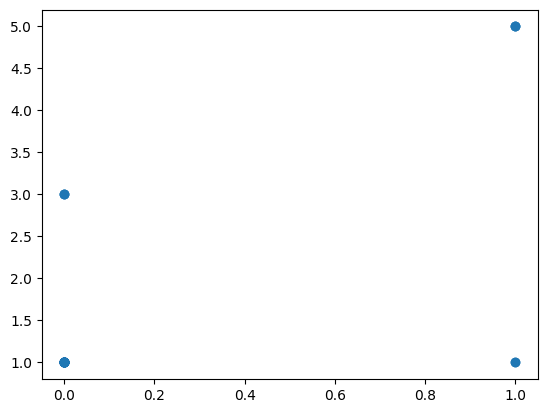

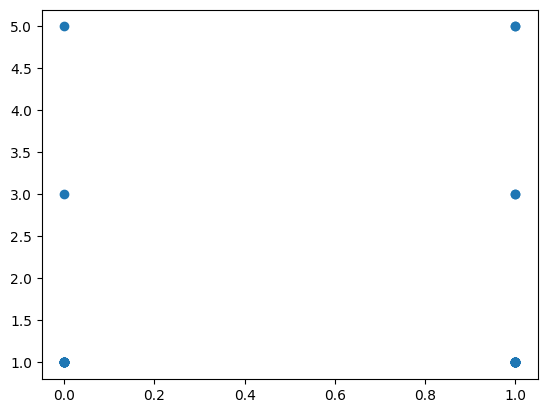

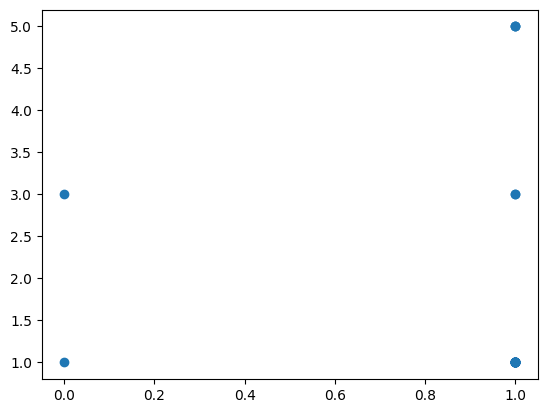

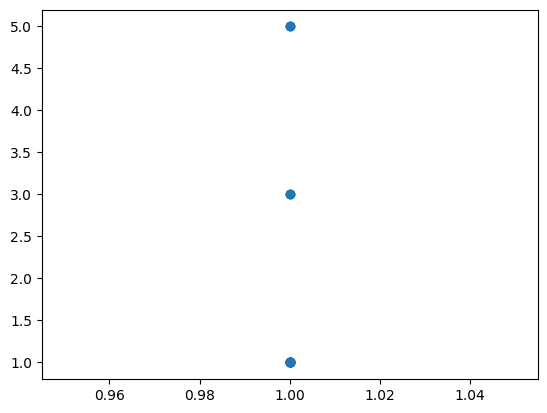

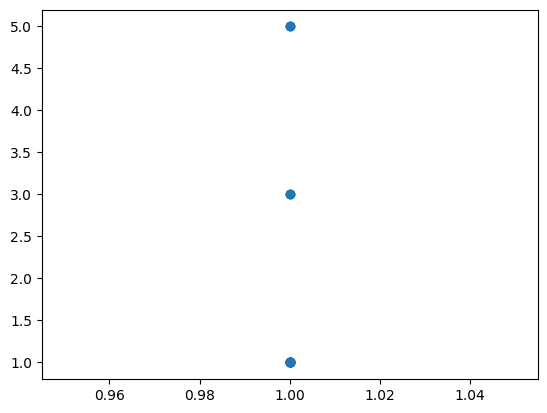

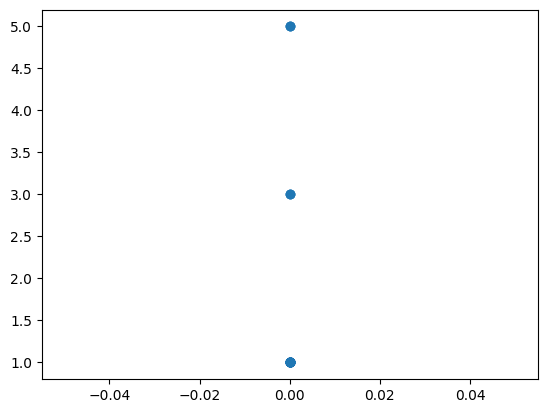

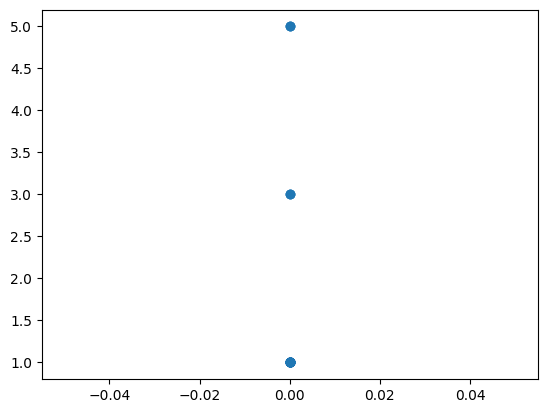

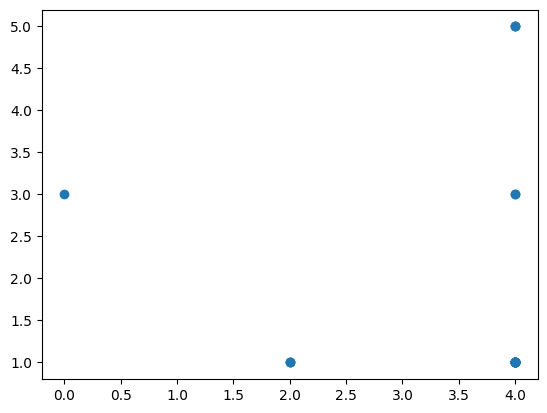

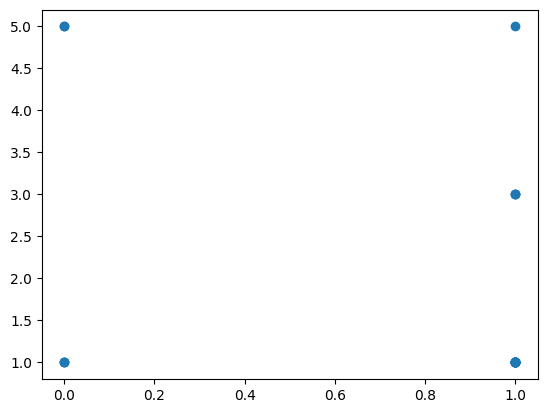

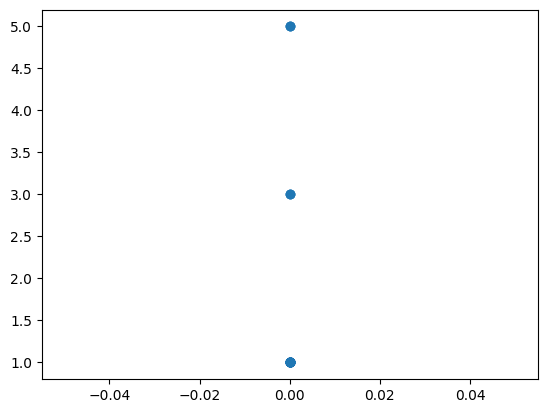

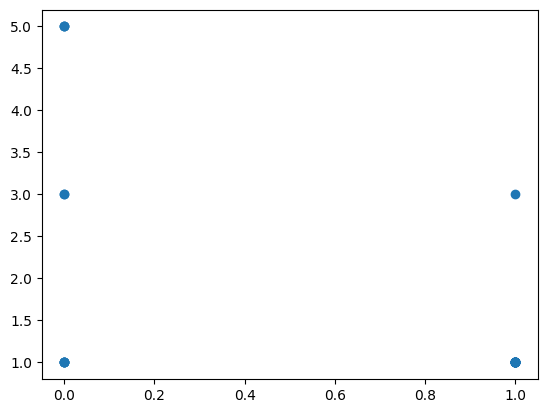

In [11]:
# scatter ploting with respect to the type variable :

for col in columns:
    plt.figure()
    plt.scatter(x = df[col],y = df["type"])
    plt.show()

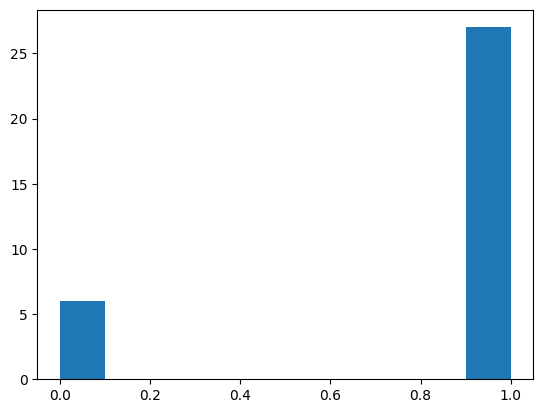

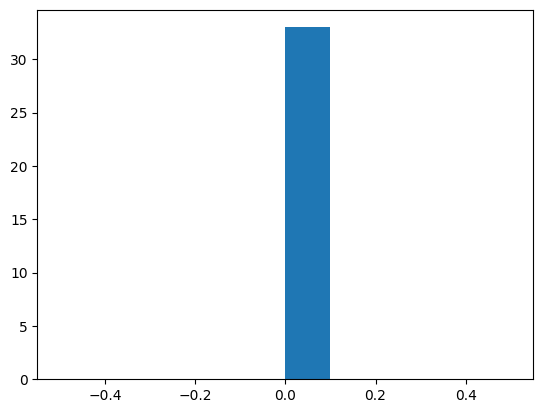

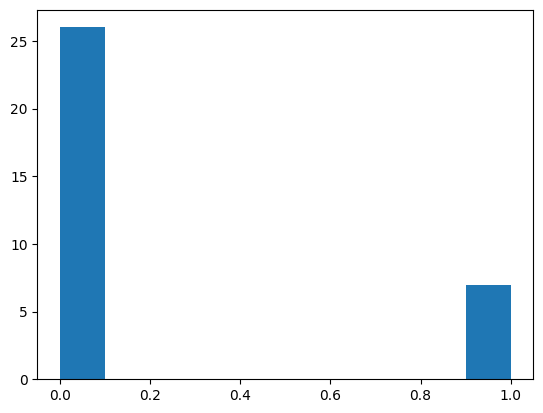

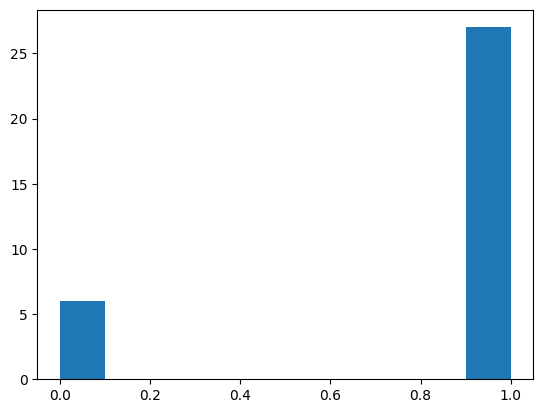

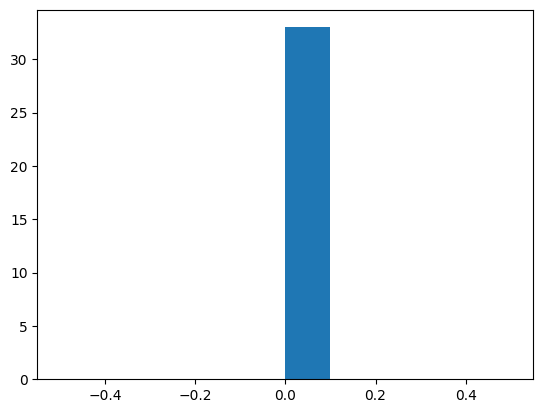

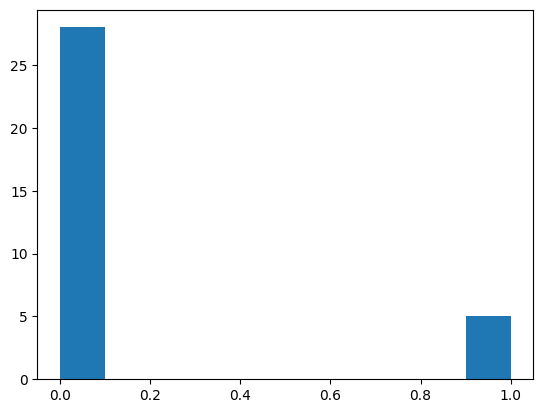

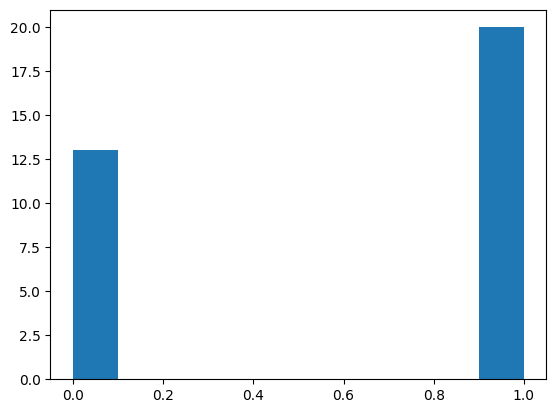

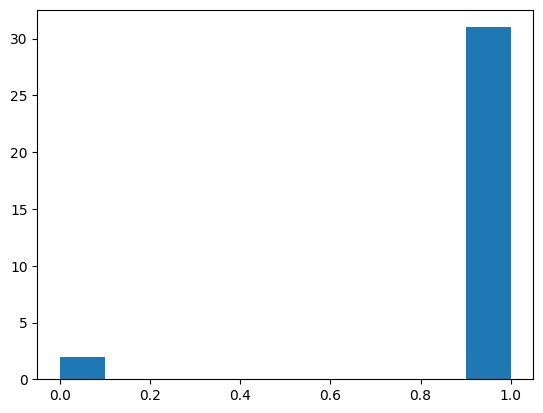

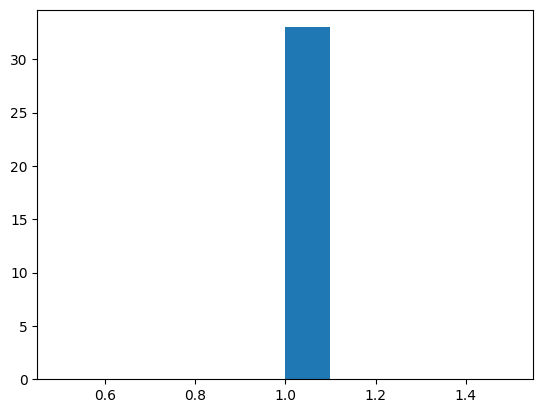

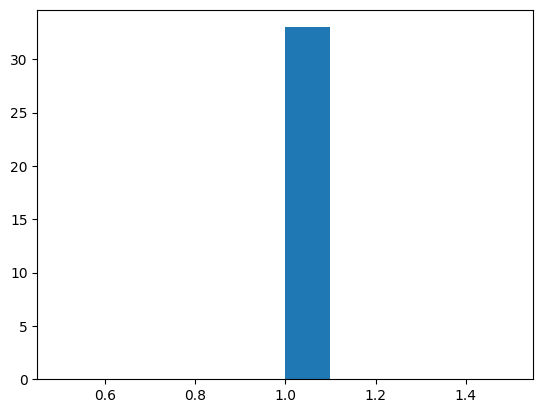

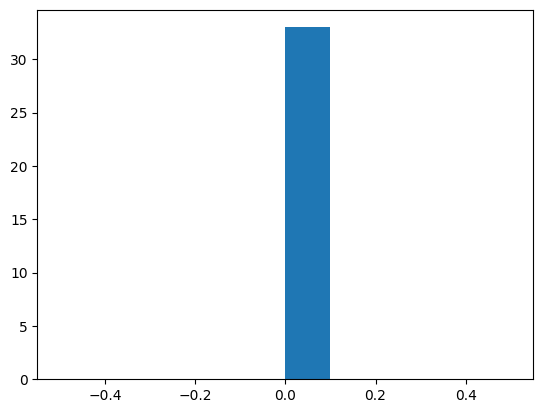

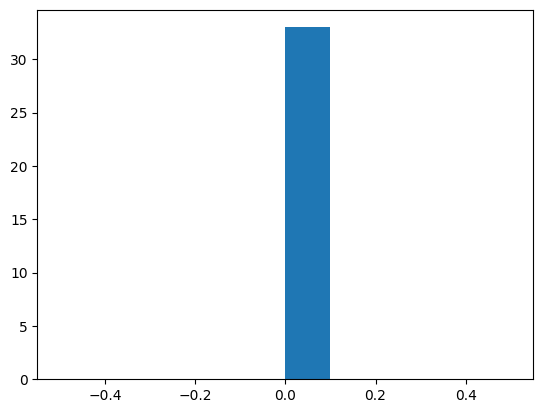

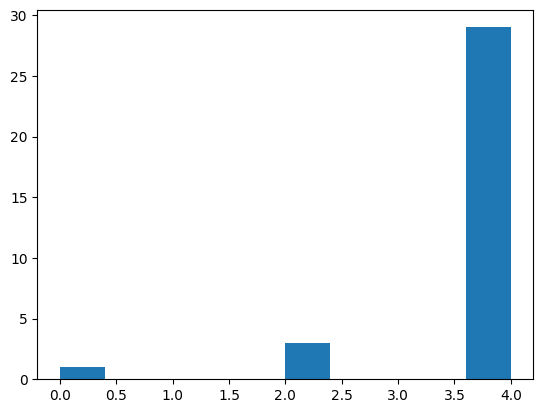

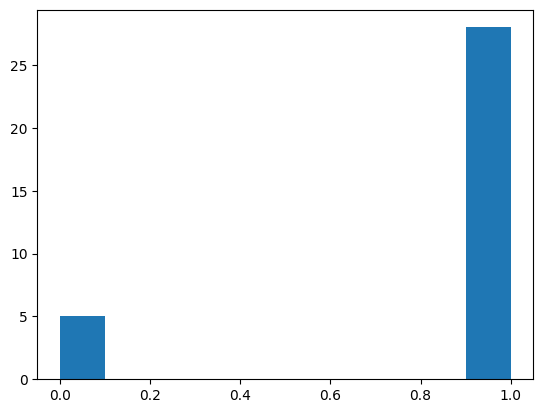

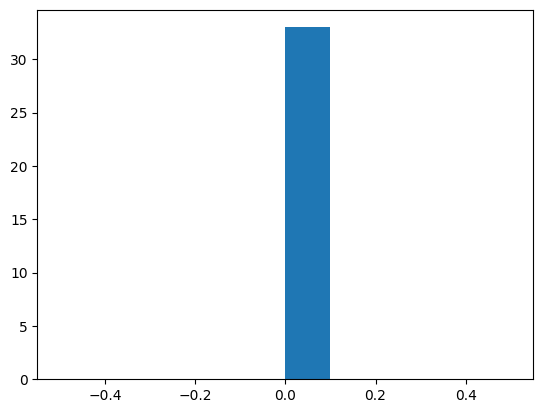

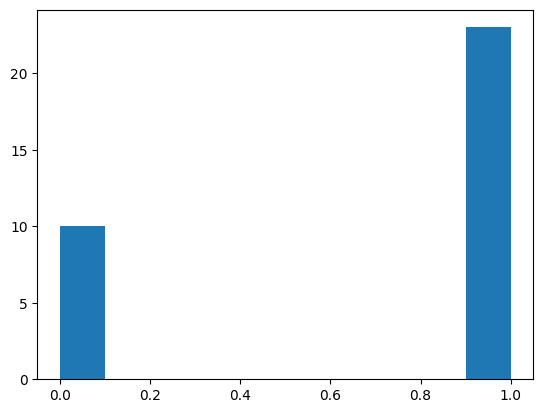

In [12]:
# histogram for the x variables:

for col in columns:
    plt.figure()
    plt.hist(df[col])
    plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_col = le.fit_transform(df["animal name"])
le_col = pd.DataFrame(le_col) 
le_col.columns = ["animal name"]
df["animal name"] =le_col

In [14]:
X = df.drop(columns = ["animal name","type"])
Y = df["type"]

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [16]:
print("train accuracy score is : ",accuracy_score(y_train,y_train_pred))
print("test accuracy score is : ",accuracy_score(y_test,y_test_pred))

train accuracy score is :  0.9615384615384616
test accuracy score is :  1.0


In [18]:
# cross validation:

training_accuracy = []
test_accuracy = []
for i in range(1,201):
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size= 0.3, random_state= i)
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    training_accuracy . append(accuracy_score(y_train,y_train_pred))
    test_accuracy .append(accuracy_score(y_test,y_test_pred))
print("Cross validaton training accuracy:",np.round(np.mean(training_accuracy)*100,2))
print("Cross validaton test accuracy:",np.round(np.mean(test_accuracy)*100,2)) 


Cross validaton training accuracy: 93.0
Cross validaton test accuracy: 86.2


In [19]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='macro'))
print("Recall:", recall_score(y_test, y_test_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='macro'))


Accuracy: 0.7
Precision: 0.2333333333333333
Recall: 0.3333333333333333
F1 Score: 0.2745098039215686


C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


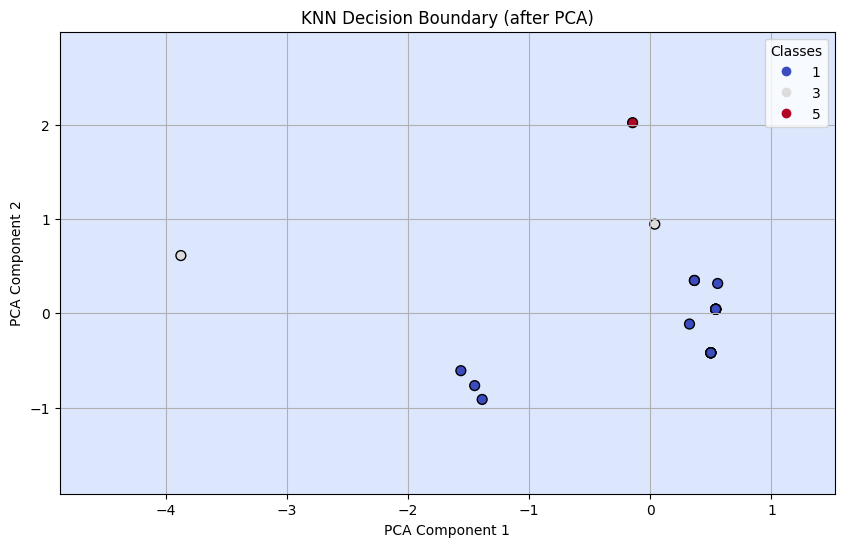

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce feature dimensions to 2 using PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(x_train)
X_test_2D = pca.transform(x_test)

# Re-train KNN on 2D data
from sklearn.neighbors import KNeighborsClassifier

knn_2d = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn_2d.fit(X_train_2D, y_train)

# Create mesh grid
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN Decision Boundary (after PCA)")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()


Interview Questions:

The key hyperparameters in KNN are:
1.n_neighbors (K):
The number of nearest neighbors to consider when making a prediction.
2.metric:
The distance function used to measure similarity (e.g., Euclidean, Manhattan).
3.weights:
Determines whether all neighbors contribute equally or closer ones have more influence.


2.Distance metrics can be used in KNN is:
-->Euclidean distance (default):
Straight-line distance between two points.
Best for continuous, real-valued features.

-->Hamming distance:
For categorical variables or binary data.
Counts the number of differing bits.

